In [1]:
import os
import zipfile
import re
import csv
from cassis import *

In [3]:
SNOMED_NER = {
    "307146003 |Sunday (qualifier value)|": "TIM",
    "1811000175105 |Every six hours as required (qualifier value)|": "TIM",
    "732936001 |Tablet (unit of presentation)|": "UNI",
    "1521000175104 |After dinner (qualifier value)|": "TIM",
    "34206005 |Subcutaneous route (qualifier value)|": "ROU",
    "26643006 |Oral route (qualifier value)|": "ROU",
    "54485002 |Ophthalmic route (qualifier value)|": "ROU",
    "6064005 |Topical route (qualifier value)|": "ROU",
    "258682000 |gram (qualifier value)|": "MEAS",
    "258798001 |Milligram/milliliter (qualifier value)|": "MEAS",
    "225758001 |After food (qualifier value)|": "TIM",
    "47625008 |Intravenous route (qualifier value)|": "ROU",
    "763158003 |Medicinal product (product)|": "MED",
    "1781000175108 |Every eight hours as required (qualifier value)|": "TIM",
    "732937005 |Capsule (unit of presentation)|": "UNI",
    "225761000 |As required (qualifier value)|": "TIM",
    "258685003 |microgram (qualifier value)|": "MEAS",
    "1791000175106 |Every four hours as required (qualifier value)|": "TIM",
    "415067009 |Percentage unit (qualifier value)|": "MEAS",
    "732997007 |Inhaler (unit of presentation)|": "UNI",
    "1287350009 |After breakfast (qualifier value)|": "TIM",
    "258773002 |Milliliter (qualifier value)|": "MEAS",
    "229798009 |Three times daily (qualifier value)|": "TIM",
    "20050000 |Biweekly (qualifier value)|": "TIM",
    "307155000 |Before sleeping (qualifier value)|": "TIM",
    "258705008 |week (qualifier value)|": "TIM",
    "37161004 |Rectal route (qualifier value)|": "ROU",
    "229799001 |Twice a day (qualifier value)|": "TIM",
    "396117002 |Monday through Friday (qualifier value)|": "TIM",
    "307151009 |Saturday (qualifier value)|": "TIM",
    "225757006 |Every four to six hours (qualifier value)|": "TIM",
    "733013000 |Sachet (unit of presentation)|": "UNI",
    "311503006 |With or after meal (qualifier value)|": "TIM",
    "307439001 |Four times daily (qualifier value)|": "TIM",
    "307145004 |Monday (qualifier value)|": "TIM",
    "418913000 |Arbitrary unit per milliliter (qualifier value)|": "MEAS",
    "733005001 |Patch (unit of presentation)|": "UNI",
    "307470009 |Every twelve hours (qualifier value)|": "TIM",
    "258766007 |Arbitrary unit (qualifier value)|": "MEAS",
    "732994000 |Drop (unit of presentation)|": "UNI",
    "225769003 |Once a week (qualifier value)|": "TIM",
    "307165006 |Before meal (qualifier value)|": "TIM",
    "229797004 |Once daily (qualifier value)|": "TIM",
    "732935002 |Unit of presentation (unit of presentation)|": "UNI",
    "307469008 |Every eight hours (qualifier value)|": "TIM",
    "24863003 |Postprandial (qualifier value)|": "TIM",
    "225756002 |Every four hours (qualifier value)|": "TIM",
    "18629005 |Administration of drug or medicament (procedure)|": "PRO",
    "RTIM":"RTIM"
}


In [4]:
snomed_concepts = {
    "307146003 |Sunday (qualifier value)|":"272103003 |Time patterns (qualifier value)|",
    "1811000175105 |Every six hours as required (qualifier value)|":"272103003 |Time patterns (qualifier value)|",
    "732936001 |Tablet (unit of presentation)|":"732935002 |Unit of presentation (unit of presentation)|",
    "1521000175104 |After dinner (qualifier value)|":"272103003 |Time patterns (qualifier value)|",
    "34206005 |Subcutaneous route (qualifier value)|":"284009009 |Route of administration value (qualifier value)|",
    "26643006 |Oral route (qualifier value)|":"284009009 |Route of administration value (qualifier value)|",
    "54485002 |Ophthalmic route (qualifier value)|":"284009009 |Route of administration value (qualifier value)|",
    "6064005 |Topical route (qualifier value)|":"284009009 |Route of administration value (qualifier value)|",
    "258682000 |gram (qualifier value)|":"767524001 |Unit of measure (qualifier value)|",
    "258798001 |Milligram/milliliter (qualifier value)|":"767524001 |Unit of measure (qualifier value)|",
    "225758001 |After food (qualifier value)|":"272103003 |Time patterns (qualifier value)|",
    "47625008 |Intravenous route (qualifier value)|":"284009009 |Route of administration value (qualifier value)|",
    "763158003 |Medicinal product (product)|":"763158003 |Medicinal product (product)|",
    "1781000175108 |Every eight hours as required (qualifier value)|":"272103003 |Time patterns (qualifier value)|",
    "732937005 |Capsule (unit of presentation)|":"732935002 |Unit of presentation (unit of presentation)|",
    "225761000 |As required (qualifier value)|":"272103003 |Time patterns (qualifier value)|",
    "258685003 |microgram (qualifier value)|":"767524001 |Unit of measure (qualifier value)|",
    "1791000175106 |Every four hours as required (qualifier value)|":"272103003 |Time patterns (qualifier value)|",
    "415067009 |Percentage unit (qualifier value)|":"767524001 |Unit of measure (qualifier value)|",
    "732997007 |Inhaler (unit of presentation)|":"732935002 |Unit of presentation (unit of presentation)|",
    "1287350009 |After breakfast (qualifier value)|":"272103003 |Time patterns (qualifier value)|",
    "258773002 |Milliliter (qualifier value)|":"767524001 |Unit of measure (qualifier value)|",
    "229798009 |Three times daily (qualifier value)|":"272103003 |Time patterns (qualifier value)|",
    "20050000 |Biweekly (qualifier value)|":"272103003 |Time patterns (qualifier value)|",
    "307155000 |Before sleeping (qualifier value)|":"272103003 |Time patterns (qualifier value)|",
    "258705008 |week (qualifier value)|":"272103003 |Time patterns (qualifier value)|",
    "37161004 |Rectal route (qualifier value)|":"284009009 |Route of administration value (qualifier value)|",
    "229799001 |Twice a day (qualifier value)|":"272103003 |Time patterns (qualifier value)|",
    "396117002 |Monday through Friday (qualifier value)|":"272103003 |Time patterns (qualifier value)|",
    "307151009 |Saturday (qualifier value)|":"272103003 |Time patterns (qualifier value)|",
    "225757006 |Every four to six hours (qualifier value)|":"272103003 |Time patterns (qualifier value)|",
    "733013000 |Sachet (unit of presentation)|":"732935002 |Unit of presentation (unit of presentation)|",
    "311503006 |With or after meal (qualifier value)|":"272103003 |Time patterns (qualifier value)|",
    "307439001 |Four times daily (qualifier value)|":"272103003 |Time patterns (qualifier value)|",
    "307145004 |Monday (qualifier value)|":"272103003 |Time patterns (qualifier value)|",
    "418913000 |Arbitrary unit per milliliter (qualifier value)|":"767524001 |Unit of measure (qualifier value)|",
    "733005001 |Patch (unit of presentation)|":"732935002 |Unit of presentation (unit of presentation)|",
    "307470009 |Every twelve hours (qualifier value)|":"272103003 |Time patterns (qualifier value)|",
    "258766007 |Arbitrary unit (qualifier value)|":"767524001 |Unit of measure (qualifier value)|",
    "732994000 |Drop (unit of presentation)|":"732935002 |Unit of presentation (unit of presentation)|",
    "225769003 |Once a week (qualifier value)|":"272103003 |Time patterns (qualifier value)|",
    "307165006 |Before meal (qualifier value)|":"272103003 |Time patterns (qualifier value)|",
    "229797004 |Once daily (qualifier value)|":"272103003 |Time patterns (qualifier value)|",
    "732935002 |Unit of presentation (unit of presentation)|":"732935002 |Unit of presentation (unit of presentation)|",
    "307469008 |Every eight hours (qualifier value)|":"272103003 |Time patterns (qualifier value)|",
    "24863003 |Postprandial (qualifier value)|":"272103003 |Time patterns (qualifier value)|",
    "225756002 |Every four hours (qualifier value)|":"272103003 |Time patterns (qualifier value)|",
    "18629005 |Administration of drug or medicament (procedure)|":"18629005 |Administration of drug or medicament (procedure)|",
    "RTIM":"RTIM"
}

## Extract Zip Files

In [14]:
# Specify the main folder path where zip files are located
input = '/Users/natthanaphopisaradech/Library/CloudStorage/OneDrive-ChiangMaiUniversity/Work Projects/Ph.D/Thesis/model_lab/INCEPTION_EXPORT/V2_Medication_extraction/DATASET/curation'
#input = '/Users/natthanaphopisaradech/Library/CloudStorage/OneDrive-ChiangMaiUniversity/Work Projects/Ph.D/THESIS/model_lab/INCEPTION_EXPORT/curation'

# Function to extract zip files in the specified folder
def extract_zip_files(folder_path):
    # Walk through all folders and subfolders
    for foldername, subfolders, filenames in os.walk(folder_path):
        for filename in filenames:
            file_path = os.path.join(foldername, filename)
            if filename.endswith('.zip') and os.path.isfile(file_path):
                # Extract the zip file
                with zipfile.ZipFile(file_path, 'r') as zip_ref:
                    zip_ref.extractall(foldername)
                # Optionally, you can delete the zip file after extraction
                os.remove(file_path)
                print(f'Extracted: {file_path}')

# Call the function to extract zip files in all folders and subfolders
extract_zip_files(input)


# Get folder names

In [5]:
# Specify the main folder path you want to iterate through
curation_path = '/Users/natthanaphopisaradech/Library/CloudStorage/OneDrive-ChiangMaiUniversity/Work Projects/Ph.D/Thesis/model_lab/INCEPTION_EXPORT/V2_Medication_extraction/DATASET/curation'

# Function to iterate through folders and get folder names
def get_folder_names(folder_path):
    folder_names = []
    for foldername, subfolders, filenames in os.walk(folder_path):
        # Add the current folder name to the list
        folder_names.append(subfolders)
        # If you want to exclude subfolders, you can use break here
        # break
    return folder_names

# Call the function to get folder names
folders = get_folder_names(curation_path)

# Print the folder names
print("Folder names:")
print(folders[0])

folder_list = folders[0]
folder_list


Folder names:
['eA-1849.txt', 'eA-1493.txt', 'eA-110.txt', 'eA-104.txt', 'eA-1257.txt', 'eA-1479.txt', 'eA-1121.txt', 'eA-1684.txt', 'eA-1137.txt', 'eA-1724.txt', 'eA-112.txt', 'eA-1678.txt', 'eA-1127.txt', 'eA-1696.txt', 'eA-1131.txt', 'eA-1441.txt', 'eA-1509.txt', 'eA-1247.txt', 'eA-2029.txt', 'eA-114.txt', 'eA-1355.txt', 'eA-1209.txt', 'eA-1793.txt', 'eA-1817.txt', 'eA-1195.txt', 'eA-1815.txt', 'eA-206.txt', 'eA-1632.txt', 'eA-1961.txt', 'eA-20.txt', 'eA-1179.txt', 'eA-18.txt', 'eA-1971.txt', 'eA-1636.txt', 'eA-1839.txt', 'eA-202.txt', 'eA-1807.txt', 'eA-1813.txt', 'eA-2077.txt', 'eA-1967.txt', 'eA-1032.txt', 'eA-1219.txt', 'eA-1580.txt', 'eA-1147.txt', 'eA-1604.txt', 'eA-1638.txt', 'eA-1566.txt', 'eA-1981.txt', 'eA-1229.txt', 'eA-1349.txt', 'eA-1149.txt', 'eA-2093.txt', 'eA-1773.txt', 'eA-1772.txt', 'eA-2045.txt', 'eA-1558.txt', 'eA-2079.txt', 'eA-1835.txt', 'eA-1809.txt', 'eA-2041.txt', 'eA-1789.txt', 'eA-1038.txt', 'eA-1993.txt', 'eA-2083.txt', 'eA-1167.txt', 'eA-1173.txt', 'eA-1

['eA-1849.txt',
 'eA-1493.txt',
 'eA-110.txt',
 'eA-104.txt',
 'eA-1257.txt',
 'eA-1479.txt',
 'eA-1121.txt',
 'eA-1684.txt',
 'eA-1137.txt',
 'eA-1724.txt',
 'eA-112.txt',
 'eA-1678.txt',
 'eA-1127.txt',
 'eA-1696.txt',
 'eA-1131.txt',
 'eA-1441.txt',
 'eA-1509.txt',
 'eA-1247.txt',
 'eA-2029.txt',
 'eA-114.txt',
 'eA-1355.txt',
 'eA-1209.txt',
 'eA-1793.txt',
 'eA-1817.txt',
 'eA-1195.txt',
 'eA-1815.txt',
 'eA-206.txt',
 'eA-1632.txt',
 'eA-1961.txt',
 'eA-20.txt',
 'eA-1179.txt',
 'eA-18.txt',
 'eA-1971.txt',
 'eA-1636.txt',
 'eA-1839.txt',
 'eA-202.txt',
 'eA-1807.txt',
 'eA-1813.txt',
 'eA-2077.txt',
 'eA-1967.txt',
 'eA-1032.txt',
 'eA-1219.txt',
 'eA-1580.txt',
 'eA-1147.txt',
 'eA-1604.txt',
 'eA-1638.txt',
 'eA-1566.txt',
 'eA-1981.txt',
 'eA-1229.txt',
 'eA-1349.txt',
 'eA-1149.txt',
 'eA-2093.txt',
 'eA-1773.txt',
 'eA-1772.txt',
 'eA-2045.txt',
 'eA-1558.txt',
 'eA-2079.txt',
 'eA-1835.txt',
 'eA-1809.txt',
 'eA-2041.txt',
 'eA-1789.txt',
 'eA-1038.txt',
 'eA-1993.txt',
 '

## Get complete file path

In [6]:
path = []
for foldername, subfolders, filenames in os.walk(curation_path):
    print(foldername)
    path.append(foldername)
    #print(subfolders)
    #print(filenames)

/Users/natthanaphopisaradech/Library/CloudStorage/OneDrive-ChiangMaiUniversity/Work Projects/Ph.D/Thesis/model_lab/INCEPTION_EXPORT/V2_Medication_extraction/DATASET/curation
/Users/natthanaphopisaradech/Library/CloudStorage/OneDrive-ChiangMaiUniversity/Work Projects/Ph.D/Thesis/model_lab/INCEPTION_EXPORT/V2_Medication_extraction/DATASET/curation/eA-1849.txt
/Users/natthanaphopisaradech/Library/CloudStorage/OneDrive-ChiangMaiUniversity/Work Projects/Ph.D/Thesis/model_lab/INCEPTION_EXPORT/V2_Medication_extraction/DATASET/curation/eA-1493.txt
/Users/natthanaphopisaradech/Library/CloudStorage/OneDrive-ChiangMaiUniversity/Work Projects/Ph.D/Thesis/model_lab/INCEPTION_EXPORT/V2_Medication_extraction/DATASET/curation/eA-110.txt
/Users/natthanaphopisaradech/Library/CloudStorage/OneDrive-ChiangMaiUniversity/Work Projects/Ph.D/Thesis/model_lab/INCEPTION_EXPORT/V2_Medication_extraction/DATASET/curation/eA-104.txt
/Users/natthanaphopisaradech/Library/CloudStorage/OneDrive-ChiangMaiUniversity/Work 

In [7]:
path = path[1:]
path

['/Users/natthanaphopisaradech/Library/CloudStorage/OneDrive-ChiangMaiUniversity/Work Projects/Ph.D/Thesis/model_lab/INCEPTION_EXPORT/V2_Medication_extraction/DATASET/curation/eA-1849.txt',
 '/Users/natthanaphopisaradech/Library/CloudStorage/OneDrive-ChiangMaiUniversity/Work Projects/Ph.D/Thesis/model_lab/INCEPTION_EXPORT/V2_Medication_extraction/DATASET/curation/eA-1493.txt',
 '/Users/natthanaphopisaradech/Library/CloudStorage/OneDrive-ChiangMaiUniversity/Work Projects/Ph.D/Thesis/model_lab/INCEPTION_EXPORT/V2_Medication_extraction/DATASET/curation/eA-110.txt',
 '/Users/natthanaphopisaradech/Library/CloudStorage/OneDrive-ChiangMaiUniversity/Work Projects/Ph.D/Thesis/model_lab/INCEPTION_EXPORT/V2_Medication_extraction/DATASET/curation/eA-104.txt',
 '/Users/natthanaphopisaradech/Library/CloudStorage/OneDrive-ChiangMaiUniversity/Work Projects/Ph.D/Thesis/model_lab/INCEPTION_EXPORT/V2_Medication_extraction/DATASET/curation/eA-1257.txt',
 '/Users/natthanaphopisaradech/Library/CloudStorage/

# Linking NER entities to Plain text

In [8]:
# Get Full DC SUM NOTES -> Function to read text files in the specified folder
def read_text_files(folder_path):
    text_files_content = {}
    data = []
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        if file_name.endswith('.txt') and os.path.isfile(file_path):
            with open(file_path, 'r') as file:
                content = file.read()
                text_files_content[file_name] = content
    for k, v in text_files_content.items():
        data.append(v)
    return data[0]

def extract_last_word_in_brackets(text):
    # Regular expression pattern to match the last word inside brackets without nested brackets
    pattern = r'\(([^()]+)\)[^()]*$'
    # Extract the last word inside brackets using regex
    match = re.search(pattern, text)
    # Return the word inside brackets if found, or the original text if not found
    return match.group(1).strip() if match else text

    
def get_value_from_dict(input_key, keys):
    try:
        float_value = float(input_key)
        #print(float_value)
        return "DEC"
    except ValueError:
        # Input is not a float, try to get the value from the dictionary
        if keys.get(input_key) == None:
            return "SUB" #"105590001 |Substance (substance)|" #input_key change to input_key if you want the full concept
        else:
            return keys.get(input_key)

In [9]:
get_value_from_dict("258773002 |Milliliter (qualifier value)|",SNOMED_NER)

'MEAS'

## Code snippets for begin,end, label linking to plain text

In [10]:
#Choose plain text

plain_text = "/Users/natthanaphopisaradech/Library/CloudStorage/OneDrive-ChiangMaiUniversity/Work Projects/Ph.D/Thesis/model_lab/INCEPTION_EXPORT/V2_Medication_extraction/DATASET/plain-text"
all_concepts = []

for path_to_xmi in path:
    # Extract the base filename from the path
    base_filename = os.path.basename(path_to_xmi)
    # Remove hyphens and special characters from the filename
    processed_filename = ''.join(c if c.isalnum() or c == '-' or c == '.' else '' for c in base_filename)
    # Print the processed filename
    text_path = plain_text + '/' + processed_filename
    text = read_text_files(text_path)
    #print(text)

    with open(path_to_xmi + '/TypeSystem.xml', 'rb') as f:
        typesystem = load_typesystem(f)

    with open(path_to_xmi + '/CURATION_USER.xmi', 'rb') as f:
        doc = load_cas_from_xmi(f, typesystem=typesystem)
    # Extract annotations
    ## DO NOT MOVE THIS
    annotations = []
    labels = []
    
    for segment in doc.select('webanno.custom.CustomMCN'):
        begin = segment.begin
        end = segment.end
        label = segment.Concept #.replace(' ', '_')  # Replace spaces with underscores for CoNLL format
        annotations.append((begin, end, get_value_from_dict(label,SNOMED_NER))) #annotations.append((begin, end, get_value_from_dict(extract_last_word_in_brackets(label))))
        labels.append(get_value_from_dict(label,SNOMED_NER)) #labels.append(get_value_from_dict(extract_last_word_in_brackets(label)))
        all_concepts.append(get_value_from_dict(label,SNOMED_NER))
    print(annotations)
        # Create a list to store CoNLL formatted tokens and annotations
    conll_lines = []

    # Initialize the current position
    current_position = 0

    # Iterate through each annotation and its position
    for begin, end, label in annotations:
        # Add 'O' labels for any text between the previous end position and the current begin position
        non_annotated_text = text[current_position:begin].strip()
        if non_annotated_text:
            non_annotated_words = non_annotated_text.split()
            for word in non_annotated_words:
                conll_lines.append(f"{word} O")

        # Add 'B-' label for the beginning of the annotated span
        annotated_span = text[begin:end].strip()
        if annotated_span:
            annotated_words = annotated_span.split()
            conll_lines.append(f"{annotated_words[0]} B-{label}")
            # Add 'I-' label for the rest of the annotated words in the span
            for word in annotated_words[1:]:
                conll_lines.append(f"{word} I-{label}")

        # Update the current position
        current_position = end

    # Add 'O' labels for any remaining text after the last annotation
    remaining_text = text[current_position:].strip()
    if remaining_text:
        remaining_words = remaining_text.split()
        for word in remaining_words:
            conll_lines.append(f"{word} O")

    # Write the CoNLL formatted lines to a text file
    ##with open('/Users/natthanaphopisaradech/Library/CloudStorage/OneDrive-ChiangMaiUniversity/Work Projects/Ph.D/THESIS/model_lab/INCEPTION_EXPORT/CoNLL' + '/' + processed_filename[:-3] + 'conll', 'w', encoding='utf-8') as f:
    with open('/Users/natthanaphopisaradech/Library/CloudStorage/OneDrive-ChiangMaiUniversity/Work Projects/Ph.D/Thesis/model_lab/INCEPTION_EXPORT/V2_Medication_extraction/EXPORT_DATASET/CoNLL_step1' + '/' + processed_filename, 'w', encoding='utf-8') as f:
        f.write('\n'.join(conll_lines))

    print("CoNLL formatted text file created successfully.")

[(1890, 1890, 'PRO'), (1890, 1890, 'MED'), (1891, 1898, 'SUB'), (1900, 1903, 'DEC'), (1905, 1906, 'DEC'), (1907, 1908, 'TIM'), (1909, 1911, 'ROU'), (1912, 1914, 'TIM')]
CoNLL formatted text file created successfully.
[(4054, 4054, 'MED'), (4054, 4054, 'PRO'), (4054, 4069, 'SUB'), (4054, 4069, 'SUB'), (4070, 4072, 'DEC'), (4073, 4074, 'DEC'), (4075, 4077, 'DEC'), (4078, 4079, 'MEAS'), (4080, 4082, 'ROU'), (4083, 4085, 'TIM'), (4088, 4088, 'MED'), (4088, 4088, 'PRO'), (4088, 4100, 'SUB'), (4102, 4104, 'DEC'), (4106, 4107, 'DEC'), (4108, 4109, 'TIM'), (4110, 4112, 'ROU'), (4113, 4115, 'TIM'), (4118, 4118, 'MED'), (4118, 4118, 'PRO'), (4118, 4128, 'SUB'), (4130, 4132, 'DEC'), (4134, 4135, 'DEC'), (4136, 4137, 'TIM'), (4138, 4140, 'ROU'), (4141, 4143, 'TIM'), (4146, 4146, 'MED'), (4146, 4146, 'PRO'), (4146, 4157, 'SUB'), (4159, 4161, 'DEC'), (4163, 4164, 'DEC'), (4165, 4166, 'TIM'), (4167, 4169, 'ROU'), (4170, 4172, 'TIM')]
CoNLL formatted text file created successfully.
[(356, 356, 'PRO'),

In [11]:
for i in all_concepts:
    print(i)

len(all_concepts)

PRO
MED
SUB
DEC
DEC
TIM
ROU
TIM
MED
PRO
SUB
SUB
DEC
DEC
DEC
MEAS
ROU
TIM
MED
PRO
SUB
DEC
DEC
TIM
ROU
TIM
MED
PRO
SUB
DEC
DEC
TIM
ROU
TIM
MED
PRO
SUB
DEC
DEC
TIM
ROU
TIM
PRO
MED
SUB
DEC
DEC
TIM
ROU
TIM
PRO
MED
SUB
DEC
DEC
TIM
ROU
TIM
PRO
MED
SUB
DEC
DEC
UNI
ROU
TIM
PRO
MED
SUB
DEC
DEC
TIM
ROU
TIM
PRO
MED
SUB
DEC
DEC
TIM
ROU
TIM
PRO
MED
SUB
DEC
DEC
TIM
ROU
TIM
TIM
PRO
MED
SUB
ROU
TIM
PRO
MED
SUB
DEC
DEC
TIM
ROU
TIM
MED
PRO
SUB
DEC
TIM
ROU
PRO
MED
SUB
DEC
DEC
TIM
PRO
MED
SUB
DEC
DEC
TIM
PRO
MED
SUB
DEC
DEC
TIM
ROU
TIM
PRO
MED
SUB
DEC
DEC
TIM
ROU
TIM
PRO
MED
SUB
DEC
TIM
ROU
TIM
MED
PRO
SUB
SUB
DEC
DEC
TIM
ROU
TIM
MED
PRO
SUB
DEC
DEC
TIM
ROU
TIM
MED
PRO
SUB
SUB
DEC
UNI
TIM
MED
PRO
SUB
SUB
DEC
UNI
TIM
MED
PRO
SUB
DEC
UNI
TIM
MED
PRO
SUB
DEC
DEC
TIM
ROU
TIM
MED
PRO
SUB
DEC
DEC
TIM
ROU
TIM
MED
PRO
SUB
DEC
DEC
TIM
ROU
TIM
MED
PRO
SUB
DEC
DEC
TIM
ROU
TIM
MED
PRO
SUB
DEC
DEC
TIM
ROU
TIM
MED
PRO
SUB
DEC
DEC
TIM
ROU
TIM
PRO
MED
SUB
DEC
DEC
TIM
ROU
TIM
MED
PRO
SUB
DEC
DEC
TIM
ROU
TIM
PRO
MED
SUB
DEC

4128

In [12]:
for i in list(set(all_concepts)):
    print(i)

RTIM
TIM
SUB
MEAS
UNI
ROU
PRO
DEC
MED


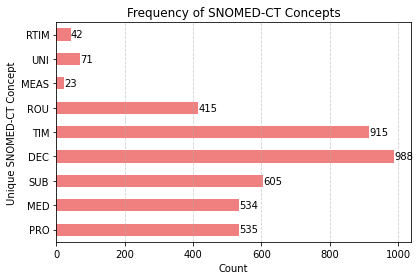

In [12]:
import seaborn as sns
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

# Replace `all_concepts` with your actual list of SNOMED-CT concepts
snomed_ct_concepts = all_concepts #

# Count occurrences and create a DataFrame
concept_counts = Counter(snomed_ct_concepts)
concept_counts_df = pd.DataFrame.from_dict(concept_counts, orient='index', columns=['Count'])

# Create a horizontal bar chart
ax = concept_counts_df.plot(kind='barh', color='lightcoral', legend=False)

# Annotate bars with counts
for i, v in enumerate(concept_counts_df['Count']):
    ax.text(v + 0.2, i, str(v), va='center', fontsize=10,
     fontweight='normal')  # Adjust offset and formatting

plt.title("Frequency of SNOMED-CT Concepts")
plt.xlabel("Count")
plt.ylabel("Unique SNOMED-CT Concept")
plt.subplots_adjust(left=0.3)  # Adjust left margin for better label visibility

# Additional customization (optional)
plt.grid(axis='x', linestyle='--', alpha=0.6)  # Add gridlines for better readability
plt.tight_layout()  # Adjust spacing between elements
plt.show()

In [14]:
list_SNOMED_NER = SNOMED_NER = [
    "307146003 |Sunday (qualifier value)|",
    "1811000175105 |Every six hours as required (qualifier value)|",
    "732936001 |Tablet (unit of presentation)|",
    "1521000175104 |After dinner (qualifier value)|",
    "34206005 |Subcutaneous route (qualifier value)|",
    "26643006 |Oral route (qualifier value)|",
    "54485002 |Ophthalmic route (qualifier value)|",
    "6064005 |Topical route (qualifier value)|",
    "258682000 |gram (qualifier value)|",
    "258798001 |Milligram/milliliter (qualifier value)|",
    "225758001 |After food (qualifier value)|",
    "47625008 |Intravenous route (qualifier value)|",
    "763158003 |Medicinal product (product)|",
    "1781000175108 |Every eight hours as required (qualifier value)|",
    "732937005 |Capsule (unit of presentation)|",
    "225761000 |As required (qualifier value)|",
    "258685003 |microgram (qualifier value)|",
    "1791000175106 |Every four hours as required (qualifier value)|",
    "415067009 |Percentage unit (qualifier value)|",
    "732997007 |Inhaler (unit of presentation)|",
    "1287350009 |After breakfast (qualifier value)|",
    "258773002 |Milliliter (qualifier value)|",
    "229798009 |Three times daily (qualifier value)|",
    "20050000 |Biweekly (qualifier value)|",
    "307155000 |Before sleeping (qualifier value)|",
    "258705008 |week (qualifier value)|",
    "37161004 |Rectal route (qualifier value)|",
    "229799001 |Twice a day (qualifier value)|",
    "396117002 |Monday through Friday (qualifier value)|",
    "307151009 |Saturday (qualifier value)|",
    "225757006 |Every four to six hours (qualifier value)|",
    "733013000 |Sachet (unit of presentation)|",
    "311503006 |With or after meal (qualifier value)|",
    "307439001 |Four times daily (qualifier value)|",
    "307145004 |Monday (qualifier value)|",
    "418913000 |Arbitrary unit per milliliter (qualifier value)|",
    "733005001 |Patch (unit of presentation)|",
    "307470009 |Every twelve hours (qualifier value)|",
    "258766007 |Arbitrary unit (qualifier value)|",
    "732994000 |Drop (unit of presentation)|",
    "225769003 |Once a week (qualifier value)|",
    "307165006 |Before meal (qualifier value)|",
    "229797004 |Once daily (qualifier value)|",
    "732935002 |Unit of presentation (unit of presentation)|",
    "307469008 |Every eight hours (qualifier value)|",
    "24863003 |Postprandial (qualifier value)|",
    "225756002 |Every four hours (qualifier value)|",
    "RTIM"
]

In [15]:
len(list(set(list_SNOMED_NER)))

48

# Merge Duplication

## First Cleanning

In [16]:
def merge_duplicates(input_file, output_file, scanning_line):
  """Merges duplicate lines in a CoNLL-U file, comparing up to 8 previous lines in a pattern.

  Args:
    input_file: The path to the input CoNLL-U file.
    output_file: The path to the output CoNLL-U file.
    scanning_line: The number of previous lines to compare
  """
  with open(input_file, 'r', encoding='utf-8') as f_in:
    with open(output_file, 'w', encoding='utf-8') as f_out:
      previous_lines = []  # Store up to 8 previous lines

      for line in f_in:
        if line.strip():
          parts = line.split()
          entity = ' '.join(parts[:-1])
          label = parts[-1]

          duplicate = False
          # Check for duplicates in the previous lines, following the pattern
          for i in range(len(previous_lines)):
            prev_parts = previous_lines[i].split()
            prev_entity = ' '.join(prev_parts[:-1])
            prev_label = prev_parts[-1]

            # Check for pattern match and non-"O" labels
            if (i % 4 == 0 or i % 4 == 3) and entity == prev_entity and label != "O" and prev_label != "O":
              duplicate = True
              break

          if not duplicate:
            f_out.write(line)

          # Update previous lines, maintaining a maximum of 8
          previous_lines.append(line.strip())
          previous_lines = previous_lines[-scanning_line:]  # Keep only the last 8 lines

def process_folder(input_folder, output_folder):
  """Processes all CoNLL-U files in a folder, merging duplicates in each file.

  Args:
    input_folder: The path to the folder containing the CoNLL-U files.
    output_folder: The path to the folder where the merged CoNLL-U files will be written.
  """
  for filename in os.listdir(input_folder):
    if filename.endswith(".txt"):  # Check if it's a text file (assuming CoNLL-U)
      input_file = os.path.join(input_folder, filename)
      output_file = os.path.join(output_folder, filename)  # Same filename in output folder

      # Create output folder if it doesn't exist
      os.makedirs(output_folder, exist_ok=True)  

      merge_duplicates(input_file, output_file, 5)
      print(f"Merged duplicates in: {input_file}")

if __name__ == "__main__":
  input_folder = "/Users/natthanaphopisaradech/Library/CloudStorage/OneDrive-ChiangMaiUniversity/Work Projects/Ph.D/Thesis/model_lab/INCEPTION_EXPORT/V2_Medication_extraction/EXPORT_DATASET/CoNLL_step1"  # Replace with your folder path
  output_folder = "/Users/natthanaphopisaradech/Library/CloudStorage/OneDrive-ChiangMaiUniversity/Work Projects/Ph.D/Thesis/model_lab/INCEPTION_EXPORT/V2_Medication_extraction/EXPORT_DATASET/CoNLL_step2"  # Replace with your desired output folder (can be the same)

  process_folder(input_folder, output_folder)


Merged duplicates in: /Users/natthanaphopisaradech/Library/CloudStorage/OneDrive-ChiangMaiUniversity/Work Projects/Ph.D/Thesis/model_lab/INCEPTION_EXPORT/V2_Medication_extraction/EXPORT_DATASET/CoNLL_step1/eA-1849.txt
Merged duplicates in: /Users/natthanaphopisaradech/Library/CloudStorage/OneDrive-ChiangMaiUniversity/Work Projects/Ph.D/Thesis/model_lab/INCEPTION_EXPORT/V2_Medication_extraction/EXPORT_DATASET/CoNLL_step1/eA-1493.txt
Merged duplicates in: /Users/natthanaphopisaradech/Library/CloudStorage/OneDrive-ChiangMaiUniversity/Work Projects/Ph.D/Thesis/model_lab/INCEPTION_EXPORT/V2_Medication_extraction/EXPORT_DATASET/CoNLL_step1/eA-110.txt
Merged duplicates in: /Users/natthanaphopisaradech/Library/CloudStorage/OneDrive-ChiangMaiUniversity/Work Projects/Ph.D/Thesis/model_lab/INCEPTION_EXPORT/V2_Medication_extraction/EXPORT_DATASET/CoNLL_step1/eA-104.txt
Merged duplicates in: /Users/natthanaphopisaradech/Library/CloudStorage/OneDrive-ChiangMaiUniversity/Work Projects/Ph.D/Thesis/mod

## Second Cleaning with 4 previous line scanning [can imprve the code by writing an iteration]

In [40]:
def merge_duplicates(input_file, output_file, scanning_line):
  """Merges duplicate lines in a CoNLL-U file, comparing up to 8 previous lines in a pattern.

  Args:
    input_file: The path to the input CoNLL-U file.
    output_file: The path to the output CoNLL-U file.
    scanning_line: The number of previous lines to compare
  """
  with open(input_file, 'r', encoding='utf-8') as f_in:
    with open(output_file, 'w', encoding='utf-8') as f_out:
      previous_lines = []  # Store up to 8 previous lines

      for line in f_in:
        if line.strip():
          parts = line.split()
          entity = ' '.join(parts[:-1])
          label = parts[-1]

          duplicate = False
          # Check for duplicates in the previous lines, following the pattern
          for i in range(len(previous_lines)):
            prev_parts = previous_lines[i].split()
            prev_entity = ' '.join(prev_parts[:-1])
            prev_label = prev_parts[-1]

            # Check for pattern match and non-"O" labels
            if (i % 4 == 0 or i % 4 == 3) and entity == prev_entity and label != "O" and prev_label != "O":
              duplicate = True
              break

          if not duplicate:
            f_out.write(line)

          # Update previous lines, maintaining a maximum of 8
          previous_lines.append(line.strip())
          previous_lines = previous_lines[-scanning_line:]  # Keep only the last 8 lines

def process_folder(input_folder, output_folder):
  """Processes all CoNLL-U files in a folder, merging duplicates in each file.

  Args:
    input_folder: The path to the folder containing the CoNLL-U files.
    output_folder: The path to the folder where the merged CoNLL-U files will be written.
  """
  for filename in os.listdir(input_folder):
    if filename.endswith(".txt"):  # Check if it's a text file (assuming CoNLL-U)
      input_file = os.path.join(input_folder, filename)
      output_file = os.path.join(output_folder, filename)  # Same filename in output folder

      # Create output folder if it doesn't exist
      os.makedirs(output_folder, exist_ok=True)  

      merge_duplicates(input_file, output_file, 4)
      print(f"Merged duplicates in: {input_file}")

if __name__ == "__main__":
  input_folder = "/Users/natthanaphopisaradech/Library/CloudStorage/OneDrive-ChiangMaiUniversity/Work Projects/Ph.D/Thesis/model_lab/INCEPTION_EXPORT/V2_Medication_extraction/EXPORT_DATASET/CoNLL_step2"
  output_folder = "/Users/natthanaphopisaradech/Library/CloudStorage/OneDrive-ChiangMaiUniversity/Work Projects/Ph.D/Thesis/model_lab/INCEPTION_EXPORT/V2_Medication_extraction/EXPORT_DATASET/CoNLL_step3"  # Replace with your desired output folder (can be the same)

  process_folder(input_folder, output_folder)


Merged duplicates in: /Users/natthanaphopisaradech/Library/CloudStorage/OneDrive-ChiangMaiUniversity/Work Projects/Ph.D/Thesis/model_lab/INCEPTION_EXPORT/V2_Medication_extraction/EXPORT_DATASET/CoNLL_step2/eA-1849.txt
Merged duplicates in: /Users/natthanaphopisaradech/Library/CloudStorage/OneDrive-ChiangMaiUniversity/Work Projects/Ph.D/Thesis/model_lab/INCEPTION_EXPORT/V2_Medication_extraction/EXPORT_DATASET/CoNLL_step2/eA-1493.txt
Merged duplicates in: /Users/natthanaphopisaradech/Library/CloudStorage/OneDrive-ChiangMaiUniversity/Work Projects/Ph.D/Thesis/model_lab/INCEPTION_EXPORT/V2_Medication_extraction/EXPORT_DATASET/CoNLL_step2/eA-110.txt
Merged duplicates in: /Users/natthanaphopisaradech/Library/CloudStorage/OneDrive-ChiangMaiUniversity/Work Projects/Ph.D/Thesis/model_lab/INCEPTION_EXPORT/V2_Medication_extraction/EXPORT_DATASET/CoNLL_step2/eA-104.txt
Merged duplicates in: /Users/natthanaphopisaradech/Library/CloudStorage/OneDrive-ChiangMaiUniversity/Work Projects/Ph.D/Thesis/mod

# Sliding

In [29]:
import os

def window_slider(input_file_path, output_file_path):
    # Define window size and overlap
    window_size = 50
    jump = 50

    # Read the input CoNLL file
    with open(input_file_path, "r", encoding="utf-8") as file:
        lines = file.readlines()

    # Open the output CoNLL file for writing
    with open(output_file_path, "w", encoding="utf-8") as outfile:
        # Slide the window through the lines
        for i in range(0, len(lines), jump):
            window = lines[i:i+window_size]
            # Write the window to the output CoNLL file
            for line in window:
                outfile.write(line)
            # Add an empty line to separate windows
            outfile.write("\n")

# Input folder path
input_folder = "/Users/natthanaphopisaradech/Library/CloudStorage/OneDrive-ChiangMaiUniversity/Work Projects/Ph.D/Thesis/model_lab/INCEPTION_EXPORT/V2_Medication_extraction/EXPORT_DATASET/CoNLL_step3"
# Output folder path
output_folder = "/Users/natthanaphopisaradech/Library/CloudStorage/OneDrive-ChiangMaiUniversity/Work Projects/Ph.D/Thesis/model_lab/INCEPTION_EXPORT/V2_Medication_extraction/EXPORT_DATASET/CoNLL_step4_sliding/50window-nojump"

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Iterate through files in the input folder
for filename in os.listdir(input_folder):
    # Check if the file is a text file
    if filename.endswith(".txt"):
        # Construct full paths for input and output files
        input_file_path = os.path.join(input_folder, filename)
        output_file_path = os.path.join(output_folder, filename)
        # Apply window_slider function
        window_slider(input_file_path, output_file_path)


# TRAIN VALIDATION TEST SPLITS

## Split by Ratio

In [ ]:
import os
import shutil
from random import seed, shuffle

def split_files(folder_path, output_path, train_ratio=0.11, val_ratio=0.78, test_ratio=0.11, random_seed=None):
    """
    Splits files in a folder into TRAIN, VALIDATION, and TEST folders.

    Args:
        folder_path (str): Path to the folder containing the files.
        train_ratio (float): Proportion of files for the TRAIN folder (default: 0.7).
        val_ratio (float): Proportion of files for the VALIDATION folder (default: 0.15).
        test_ratio (float): Proportion of files for the TEST folder (default: 0.15).
        random_seed (int): Optional random seed for reproducible splitting (default: None).
    """

    if train_ratio + val_ratio + test_ratio != 1:
        raise ValueError("Ratios must sum to 1.")

    if random_seed:
        seed(random_seed)  # Set the random seed

    filenames = os.listdir(folder_path)
    shuffle(filenames)  # Shuffle for randomization

    num_files = len(filenames)
    train_split = int(num_files * train_ratio)
    val_split = train_split + int(num_files * val_ratio)

    train_set = filenames[:train_split]
    val_set = filenames[train_split:val_split]
    test_set = filenames[val_split:]

    # Create the output folders
    os.makedirs("TRAIN", exist_ok=True)
    os.makedirs("VALIDATION", exist_ok=True)
    os.makedirs("TEST", exist_ok=True)

    # Move files to their respective folders
    for filename in train_set:
        shutil.copy(os.path.join(output_path, filename), "TRAIN")
    for filename in val_set:
        shutil.copy(os.path.join(output_path, filename), "VALIDATION")
    for filename in test_set:
        shutil.copy(os.path.join(output_path, filename), "TEST")

# Example usage
folder_path = "/Users/natthanaphopisaradech/Library/CloudStorage/OneDrive-ChiangMaiUniversity/Work Projects/Ph.D/Thesis/model_lab/INCEPTION_EXPORT/V2_Medication_extraction/EXPORT_DATASET/CoNLL_step4_sliding"  # Replace with your actual folder path
output_path = "/Users/natthanaphopisaradech/Library/CloudStorage/OneDrive-ChiangMaiUniversity/Work Projects/Ph.D/Thesis/model_lab/INCEPTION_EXPORT/V2_Medication_extraction/EXPORT_DATASET/CoNLL_step5_TRAIN_VALIDATION_TEST"
split_files(folder_path, output_path, random_seed=42) 


# Concatnation

In [24]:
import os

Folder_UNSLIDE = "/50window-nojump"
UNSLIDED = "_UNSLIDED"
TRAIN = "/TRAIN"
TEST = "/TEST"
VALIDATION = "/VALIDATION"

# Directory containing the input .txt files
input_directory = '/Users/natthanaphopisaradech/Library/CloudStorage/OneDrive-ChiangMaiUniversity/Work Projects/Ph.D/Thesis/model_lab/INCEPTION_EXPORT/V2_Medication_extraction/EXPORT_DATASET/CoNLL_step5_TRAIN_VALIDATION_TEST'  # Replace this with the actual directory path

# Output file where concatenated text will be saved
output_directory = "/Users/natthanaphopisaradech/Library/CloudStorage/OneDrive-ChiangMaiUniversity/Work Projects/Ph.D/Thesis/model_lab/INCEPTION_EXPORT/V2_Medication_extraction/EXPORT_DATASET/CoNLL_step6_FINAL"

# Function to concatenate text files from a directory with [enter] between files
def concatenate_files_from_directory(directory, output_file, group):
    directory = directory + group
    output_file = output_file + group + ".conll"
    with open(output_file, "w", encoding="utf-8") as output_file:
        for filename in os.listdir(directory):
            if filename.endswith(".txt"):
                file_path = os.path.join(directory, filename)
                try:
                    with open(file_path, "r", encoding="utf-8") as input_file:
                        file_content = input_file.read()
                        output_file.write(file_content)
                        output_file.write("\n\n")  # Add "[enter]" between files
                except Exception as e:
                    print(f"Error processing {file_path}: {e}")

# Call the function to concatenate files from the directory
concatenate_files_from_directory(input_directory, output_directory, TRAIN)
#print(f"Files concatenated and saved to '{output_directory}'.")
concatenate_files_from_directory(input_directory, output_directory, TEST)
print(f"Files concatenated and saved to '{output_directory}'.")
concatenate_files_from_directory(input_directory, output_directory, VALIDATION)
#print(f"Files concatenated and saved to '{output_directory}'.")


Files concatenated and saved to '/Users/natthanaphopisaradech/Library/CloudStorage/OneDrive-ChiangMaiUniversity/Work Projects/Ph.D/Thesis/model_lab/INCEPTION_EXPORT/V2_Medication_extraction/EXPORT_DATASET/CoNLL_step6_FINAL'.


In [41]:
def reduce_empty_lines(input_file, output_file):
   """Reads a CoNLL file and reduces multiple empty lines to a single empty line.

   Args:
       input_file: The path to the input CoNLL file.
       output_file: The path to the output CoNLL file.
   """

   with open(input_file, 'r', encoding='utf-8') as f_in, open(output_file, 'w', encoding='utf-8') as f_out:
       empty_lines_count = 0

       for line in f_in:
           if line.strip():  # Non-empty line
               f_out.write(line)
               empty_lines_count = 0
           else:  # Empty line
               empty_lines_count += 1
               if empty_lines_count <= 1:  # Write at most one empty line
                   f_out.write(line)

if __name__ == "__main__":
   input_file = output_file
   output_file = output_file

   reduce_empty_lines(input_file, output_file)
   print("Empty lines reduced in:", input_file)


Empty lines reduced in: /Users/natthanaphopisaradech/Library/CloudStorage/OneDrive-ChiangMaiUniversity/Work Projects/Ph.D/Thesis/model_lab/INCEPTION_EXPORT/V2_Medication_extraction/EXPORT_DATASET/CoNLL_step6_FINAL/TEST.conll


# Counting entity

In [12]:
import os

def iterate_files(folder_path):
  """Iterates through all files in a folder (not including subdirectories).

  Args:
      folder_path: The path to the folder to iterate through.
  """
  list_file = []
  for filename in os.listdir(folder_path):
    # Get the full path of the file
    file_path = os.path.join(folder_path, filename)
    # Check if it's a file (not a directory)
    if os.path.isfile(file_path):
      # Process the file (replace this with your desired action)
      #print(f"Found file: {file_path}")
      list_file.append(file_path)
  return list_file
    
# Folder of TRAIN or TEST or VALIDATION
folder_path = "/Users/natthanaphopisaradech/Library/CloudStorage/OneDrive-ChiangMaiUniversity/Work Projects/Ph.D/Thesis/model_lab/INCEPTION_EXPORT/V2_Medication_extraction/EXPORT_DATASET/CoNLL_step5_TRAIN_VALIDATION_TEST/SLIDED50NOJUMP/TEST"



list_path = iterate_files(folder_path)
list_path

['/Users/natthanaphopisaradech/Library/CloudStorage/OneDrive-ChiangMaiUniversity/Work Projects/Ph.D/Thesis/model_lab/INCEPTION_EXPORT/V2_Medication_extraction/EXPORT_DATASET/CoNLL_step5_TRAIN_VALIDATION_TEST/SLIDED50NOJUMP/TEST/eA-1121.txt',
 '/Users/natthanaphopisaradech/Library/CloudStorage/OneDrive-ChiangMaiUniversity/Work Projects/Ph.D/Thesis/model_lab/INCEPTION_EXPORT/V2_Medication_extraction/EXPORT_DATASET/CoNLL_step5_TRAIN_VALIDATION_TEST/SLIDED50NOJUMP/TEST/eA-112.txt',
 '/Users/natthanaphopisaradech/Library/CloudStorage/OneDrive-ChiangMaiUniversity/Work Projects/Ph.D/Thesis/model_lab/INCEPTION_EXPORT/V2_Medication_extraction/EXPORT_DATASET/CoNLL_step5_TRAIN_VALIDATION_TEST/SLIDED50NOJUMP/TEST/eA-1127.txt',
 '/Users/natthanaphopisaradech/Library/CloudStorage/OneDrive-ChiangMaiUniversity/Work Projects/Ph.D/Thesis/model_lab/INCEPTION_EXPORT/V2_Medication_extraction/EXPORT_DATASET/CoNLL_step5_TRAIN_VALIDATION_TEST/SLIDED50NOJUMP/TEST/eA-1131.txt',
 '/Users/natthanaphopisaradech/Li

In [13]:
import pandas as pd

entity_counts = []

for file in list_path:
  with open(file, "r") as f:
    for line in f:
      line = line.strip()  # Remove trailing whitespace
      #print(line)
      if not line:  # Skip empty lines
        continue

      # Extract token and entity type
      token, entity_type = line.split(" ")
      #print(entity_type)
      entity_counts.append(entity_type)

#print(entity_counts)

# Sample list
my_list = entity_counts

# Create a dictionary to store counts
value_counts = {}
for item in my_list:
  value_counts[item] = value_counts.get(item, 0) + 1

# Convert the dictionary to a DataFrame
df = pd.DataFrame.from_dict(value_counts, orient='index', columns=['Count'])

# Print the DataFrame
print(df)


        Count
O        4334
B-SUB      75
B-DEC     128
B-TIM      83
B-ROU      62
I-SUB       8
B-MEAS      4
B-UNI       6
I-TIM       7
I-ROU       1
B-RTIM      2
I-RTIM      3


In [54]:
import pandas as pd
entity_data = []

for file in list_path:
  with open(file, "r") as f:
    for line in f:
      line = line.strip()  # Remove trailing whitespace
      #print(line)
      if not line:  # Skip empty lines
        continue

      # Extract token and entity type
      token, entity_type = line.split(" ")
      #print(entity_type)
      set = (token, entity_type)
      entity_data.append(set)

entity_data

[('case', 'O'),
 ('male', 'O'),
 ('48', 'O'),
 ('yr', 'O'),
 ('นาย', 'O'),
 ('hn', 'O'),
 ('สิทธิ', 'O'),
 ('รพ.มหาราช', 'O'),
 ('admission', 'O'),
 ('date', 'O'),
 ('9/10/65', 'O'),
 ('known', 'O'),
 ('case', 'O'),
 ('#epilepsy', 'O'),
 ('f/u', 'O'),
 ('ปกส.', 'O'),
 ('-', 'O'),
 ('last', 'O'),
 ('seizure(10/64):', 'O'),
 ('นอน', 'O'),
 ('-', 'O'),
 ('on', 'O'),
 ('depakin', 'O'),
 ('(500)', 'O'),
 ('1x2', 'O'),
 ('po', 'O'),
 ('pc', 'O'),
 ('#old', 'O'),
 ('cva', 'O'),
 ('ปี', 'O'),
 ('2558', 'O'),
 ('#dlp', 'O'),
 ('(diet', 'O'),
 ('control)', 'O'),
 ('current', 'O'),
 ('medication', 'O'),
 ('-', 'O'),
 ('depakin', 'O'),
 ('(500)', 'O'),
 ('1x2', 'O'),
 ('po', 'O'),
 ('pc', 'O'),
 ('cc:', 'O'),
 ('ชักเกร็งกระตุก', 'O'),
 ('1.5', 'O'),
 ('hr', 'O'),
 ('pta', 'O'),
 ('pi:', 'O'),
 ('1.5', 'O'),
 ('hr', 'O'),
 ('pta', 'O'),
 ('ขณะผู้ป่วยนั่งทานอาหาร', 'O'),
 ('รู้สึกมีอาการใจสั่น', 'O'),
 ('ไม่มีเจ็บอก', 'O'),
 ('หลังจากนั้นหมดสติ', 'O'),
 ('เมืองที่เห็นเหตุการณ์แจ้งว่าผู้ป่วยชักเกร็งแ

In [51]:
# Extract entity type and character length
entity_counts = []
for token, entity_type in entity_data:
  # Append tuple with entity type and character length of the token
  entity_counts.append((entity_type, len(token)))

# Create a DataFrame
df = pd.DataFrame(entity_counts, columns=['Entity Type', 'Character Length'])

# Group by entity type and calculate total character count
df = df.groupby('Entity Type')['Character Length'].sum().reset_index()

# Print the DataFrame
print(df)

  Entity Type  Character Length
0       B-DEC               174
1      B-MEAS                 4
2       B-ROU               103
3       B-SUB               437
4       B-TIM               136
5       B-UNI                27
6       I-SUB                 4
7       I-TIM                18
8           O             17005
